# Crude Oil Analytics
This is a current hot topic within the energy sector.

###### Libraries 

Numpy 

NumPy (Numerical Python) is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

In Python we have lists that serve the purpose of arrays, but they are slow to process. NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. The array object in NumPy is called ndarray, it provides a lot of supporting functions that make working with ndarray very easy. Arrays are very frequently used in data science, where speed and resources are very important.

Pandas 

Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. As one of the most popular data wrangling packages, Pandas works well with many other data science modules inside the Python ecosystem

Matplotlib

Matplotlib is a low level graph plotting library in python that serves as a visualization utility. Matplotlib was created by John D. Hunter. Matplotlib is open source and free to use by all developers. Matplotlib is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.

Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. This visualization library is also completely open source.



###### Resources

Pandas Documentation attached: https://pandas.pydata.org/pandas-docs/stable/index.html

Seaborn Documentation: https://seaborn.pydata.org/generated/seaborn.set_style.html

In [1]:
import numpy as np # numerical python (heavy calulations)
import pandas as pd # pandas (data manipulation)
import matplotlib.pyplot as plt # matplotlib for visualization
import seaborn as sns # seaborn for visualization

In [2]:
data = pd.read_csv("crude-oil-price.csv") # import csv file as pandas dataframe

Analysing the date column which is currently an object data type we can see each month for each year goes from the first month to the last month in an ordered sequence. This is an important finding confirming the validity and consistency of our time series dataset. This means the insights we gather can be validated. There would be an issue if the dataset only contained random dates within each month/year. This would skew our inishgts and therefore discredit our datasets validity. 

In [3]:
data

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
...,...,...,...,...
466,2022-01-03T00:00:00,86.49,15.504808,11.61
467,2022-02-01T00:00:00,93.50,8.104983,7.01
468,2022-03-01T00:00:00,98.52,5.368984,5.02
469,2022-04-01T00:00:00,102.94,4.486399,4.42


NOTE

Indexing and Selecting data in Pandas Dataframe
- Dataframe.[ ] ; This function also known as indexing operator
- Dataframe.loc[ ] : This function is used for labels.
- Dataframe.iloc[ ] : This function is used for positions or integer based

ex. data.iloc[50:100] # subset data using .iloc

### Data Preparation & Summary Statistics

In [4]:
data_original = data.copy(deep = True) # Copy of original dataframe

# Data Cleaning
data['date'] = data['date'].str.strip('T00:00:00') # remove part of string using strip method
data['date'] = pd.to_datetime(data['date']) # convert 'Date' column object to datetime object
data = data.set_index(['date']) # reset dataframe index

# Summary Statistics
display(data.head(),data.shape,data.info(), data.describe()) # head of dataset, shape of dataset, dataset information & summary stats (numeric & categorical)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 1983-03-03 to 2022-05-02
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          471 non-null    float64
 1   percentChange  470 non-null    float64
 2   change         470 non-null    float64
dtypes: float64(3)
memory usage: 14.7 KB


,price,percentChange,change
date,,,
1983-03-03,29.27,NaN,NaN
1983-04-04,30.63,4.646396,1.36
1983-05-02,30.25,-1.240614,-0.38
1983-06-01,31.38,3.735537,1.13
1983-07-01,32.00,1.975781,0.62


(471, 3)

None

,price,percentChange,change
count,471.000000,470.000000,470.000000
mean,44.321889,0.847554,0.184745
std,28.582017,10.658297,4.942768
min,10.420000,-54.244861,-32.830000
25%,20.275000,-5.025023,-1.615000
50%,30.840000,1.026380,0.280000
75%,63.960000,6.474461,2.377500
max,140.000000,88.375796,16.650000


The code below is an example of how we can use our pandas dataframe datatime object index for subsetting for speicfic timeframes of interest. 

data.loc['2020':'2022']

This is very useful working with the dataset and especially when come to visualizing the data. Using charts and graphics can tell us alot about the data within a small timeframe. 

### Data Visualization

###### Lineplot 

A line plot, also called a dot plot, is a graph that shows the frequency (the number of times), a value occurs in a data set.
Line plots are constructed with each value recorded along the horizontal axis, also called the x-axis. These values can be measurements, weekdays, months, colors, sports, types of food, or anything else we want to record with a line plot. 
The number of times each value occurs is marked above that value. 

The y-axis will include the variable we wish to measure and must be quantitative data (numerical data) for example Price.

All line plots should have a title to indicate what data the plot shows.

[Text(0.5, 1.0, 'Crude Oil Price / Time')]

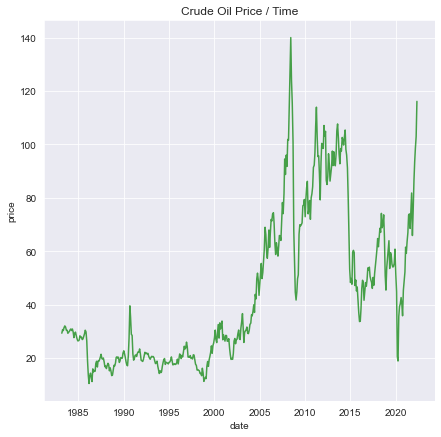

In [5]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.lineplot(x=data.index, y=data["price"], color = "green", alpha = 0.7).set(title="Crude Oil Price / Time") # lineplot

[Text(0.5, 1.0, 'Price Change / Time')]

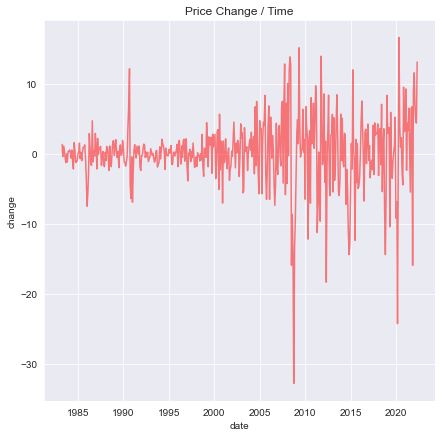

In [10]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.lineplot(x=data.index, y=data["change"], color = "r", alpha = 0.5).set(title="Price Change / Time") # lineplot

##### Kernel Density Plot

A kernel density plot is a type of plot that displays the distribution of values in a dataset using one continuous curve. A kernel density plot is similar to a histogram, but it’s even better at displaying the shape of a distribution since it isn’t affected by the number of bins used in the histogram.

[Text(0.5, 1.0, 'Crude Oil Price (Kenrel Density Plot)')]

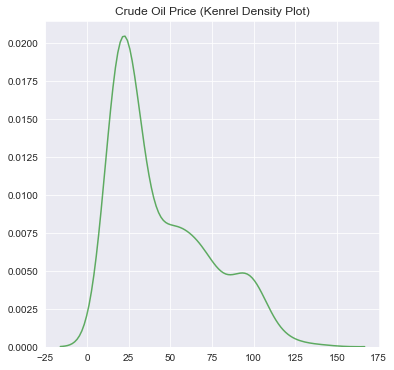

In [11]:
plt.figure(figsize=(6, 6))
sns.set_style('darkgrid')
sns.kdeplot(np.array(data['price']), color = 'g', alpha = 0.6).set(title="Crude Oil Price (Kenrel Density Plot)")

[Text(0.5, 1.0, 'Crude Oil Price Percentage Change (Kernel Density Plot)')]

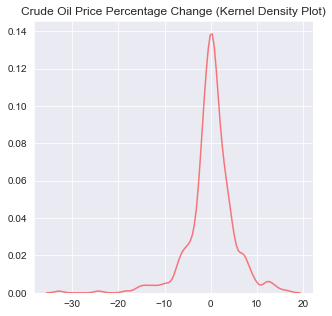

In [12]:
plt.figure(figsize=(5, 5))
sns.set_style('darkgrid')
sns.kdeplot(np.array(data['change']), color = "r", alpha = 0.5).set(title="Crude Oil Price Percentage Change (Kernel Density Plot)")

##### Scatterplot

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

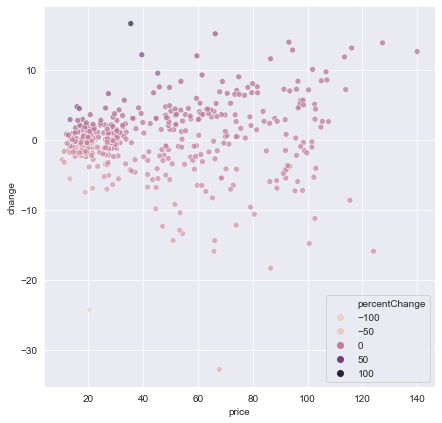

Correlation:  0.12361994162892619


In [13]:
plt.figure(figsize=(7, 7))
sns.set_style('darkgrid')
sns.scatterplot(x = "price", y = "change", hue = "percentChange", data = data, alpha = 0.7) # hue adding a third variable into scatterplot
plt.show()
print("Correlation: ", data["price"].corr(data["change"]))